# Housing Price Prediction

<img src="house.png">

# Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np

In [2]:
usahousing=pd.read_csv(r'USA_Housing.csv')

In [3]:
usahousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
# import basic libraries 
import matplotlib.pyplot as plt
%matplotlib inline
# %magic command in matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=usahousing.copy()

In [6]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe().T

count          mean            std  \
Avg. Area Income              5000.0  6.858311e+04   10657.991214   
Avg. Area House Age           5000.0  5.977222e+00       0.991456   
Avg. Area Number of Rooms     5000.0  6.987792e+00       1.005833   
Avg. Area Number of Bedrooms  5000.0  3.981330e+00       1.234137   
Area Population               5000.0  3.616352e+04    9925.650114   
Price                         5000.0  1.232073e+06  353117.626584   

                                       min            25%           50%  \
Avg. Area Income              17796.631190   61480.562390  6.880429e+04   
Avg. Area House Age               2.644304       5.322283  5.970429e+00   
Avg. Area Number of Rooms         3.236194       6.299250  7.002902e+00   
Avg. Area Number of Bedrooms      2.000000       3.140000  4.050000e+00   
Area Population                 172.610686   29403.928700  3.619941e+04   
Price                         15938.657920  997577.135075  1.232669e+06   

                                       75%           max  
Avg. Area Income              7.578334e+04  1.077017e+05  
Avg. Area House Age           6.650808e+00  9.519088e+00  
Avg. Area Number of Rooms     7.665871e+00  1.075959e+01  
Avg. Area Number of Bedrooms  4.490000e+00  6.500000e+00  
Area Population               4.286129e+04  6.962171e+04  
Price                         1.471210e+06  2.469066e+06

In [9]:
# missing value
df.isna().sum().sum()       # sum of total missing value in whole dataset

0

In [10]:
df=df.drop(['Address'],axis=1)    # dropping the address column beacause it is not usable in prediction

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

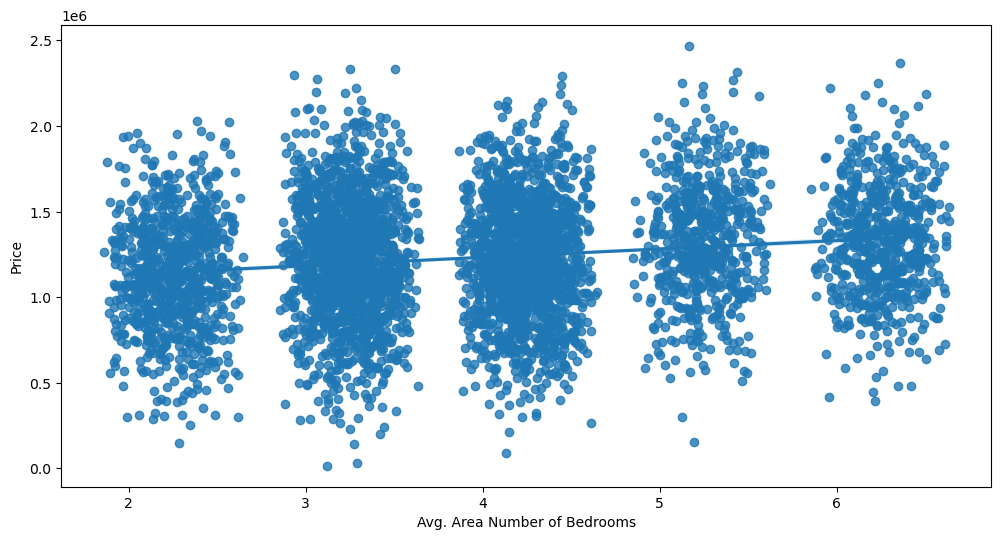

In [11]:
plt.figure(figsize=(12,6))
sns.regplot(data=df,x="Avg. Area Number of Bedrooms",y="Price",x_jitter=0.15)

<AxesSubplot:xlabel='Area Population', ylabel='Price'>

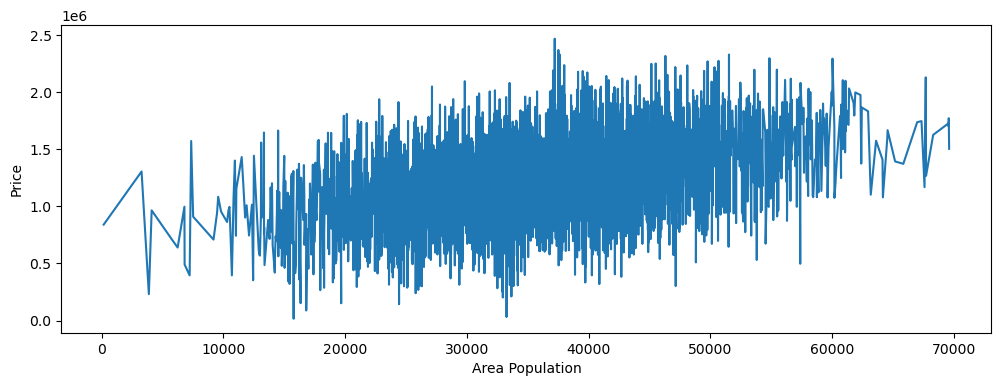

In [12]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df,x="Area Population",y="Price")

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Price'>

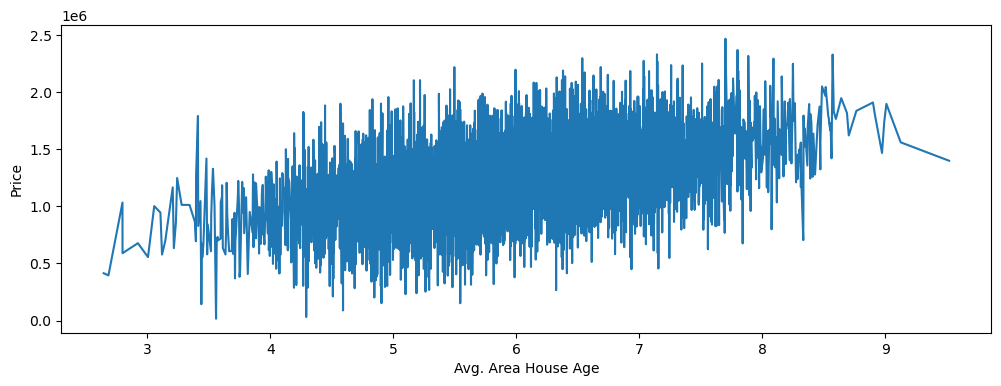

In [13]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df,x="Avg. Area House Age",y="Price")

<AxesSubplot:xlabel='Price', ylabel='Avg. Area Income'>

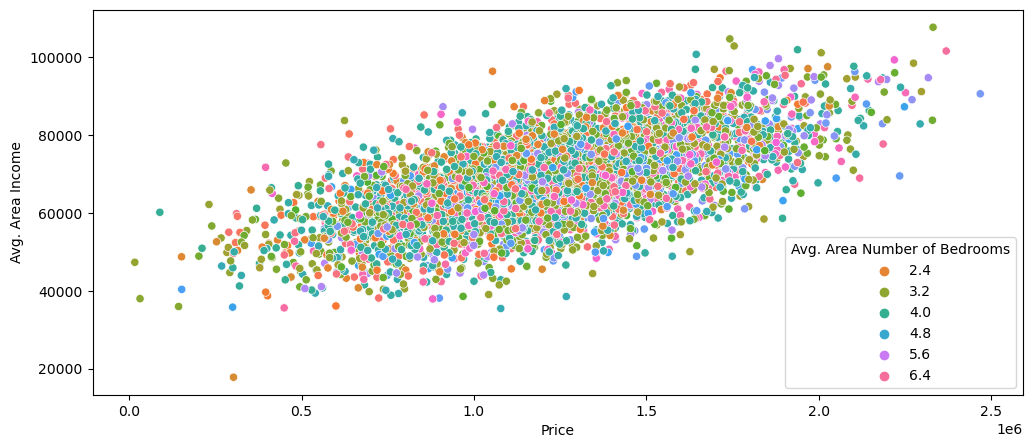

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x="Price",y="Avg. Area Income",hue="Avg. Area Number of Bedrooms",palette="husl")

<Figure size 1200x500 with 0 Axes>

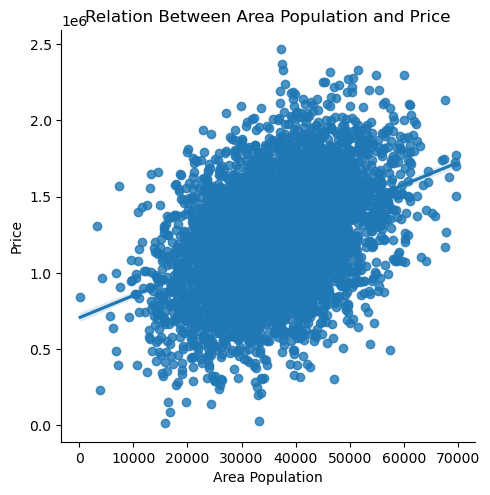

In [15]:
plt.figure(figsize=(12,5))
sns.lmplot(data=df,x="Area Population",y="Price")
plt.title("Relation Between Area Population and Price")
plt.show()

<AxesSubplot:xlabel='Area Population', ylabel='Density'>

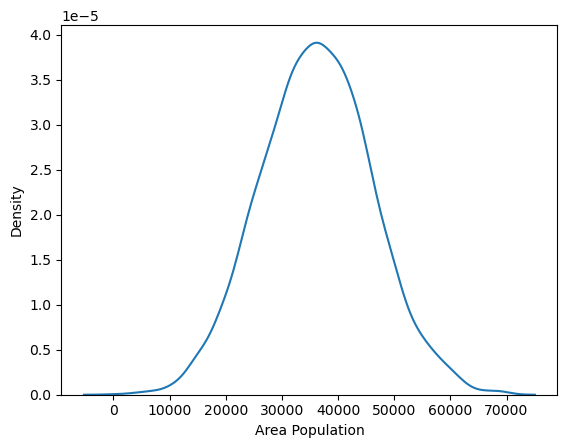

In [16]:
sns.distplot(df["Area Population"],kde=True,hist=False)

<AxesSubplot:xlabel='Price', ylabel='Density'>

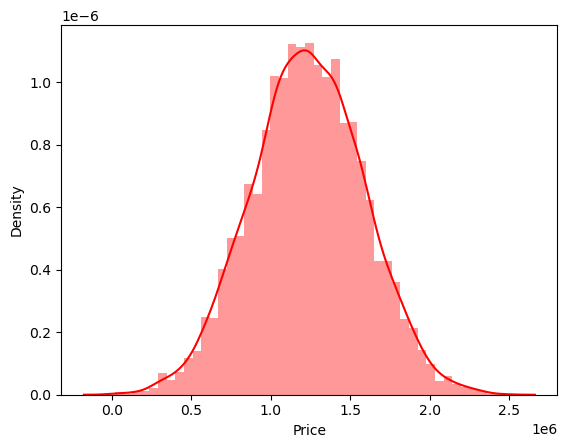

In [17]:
sns.distplot(df["Price"],kde=True,color="red")

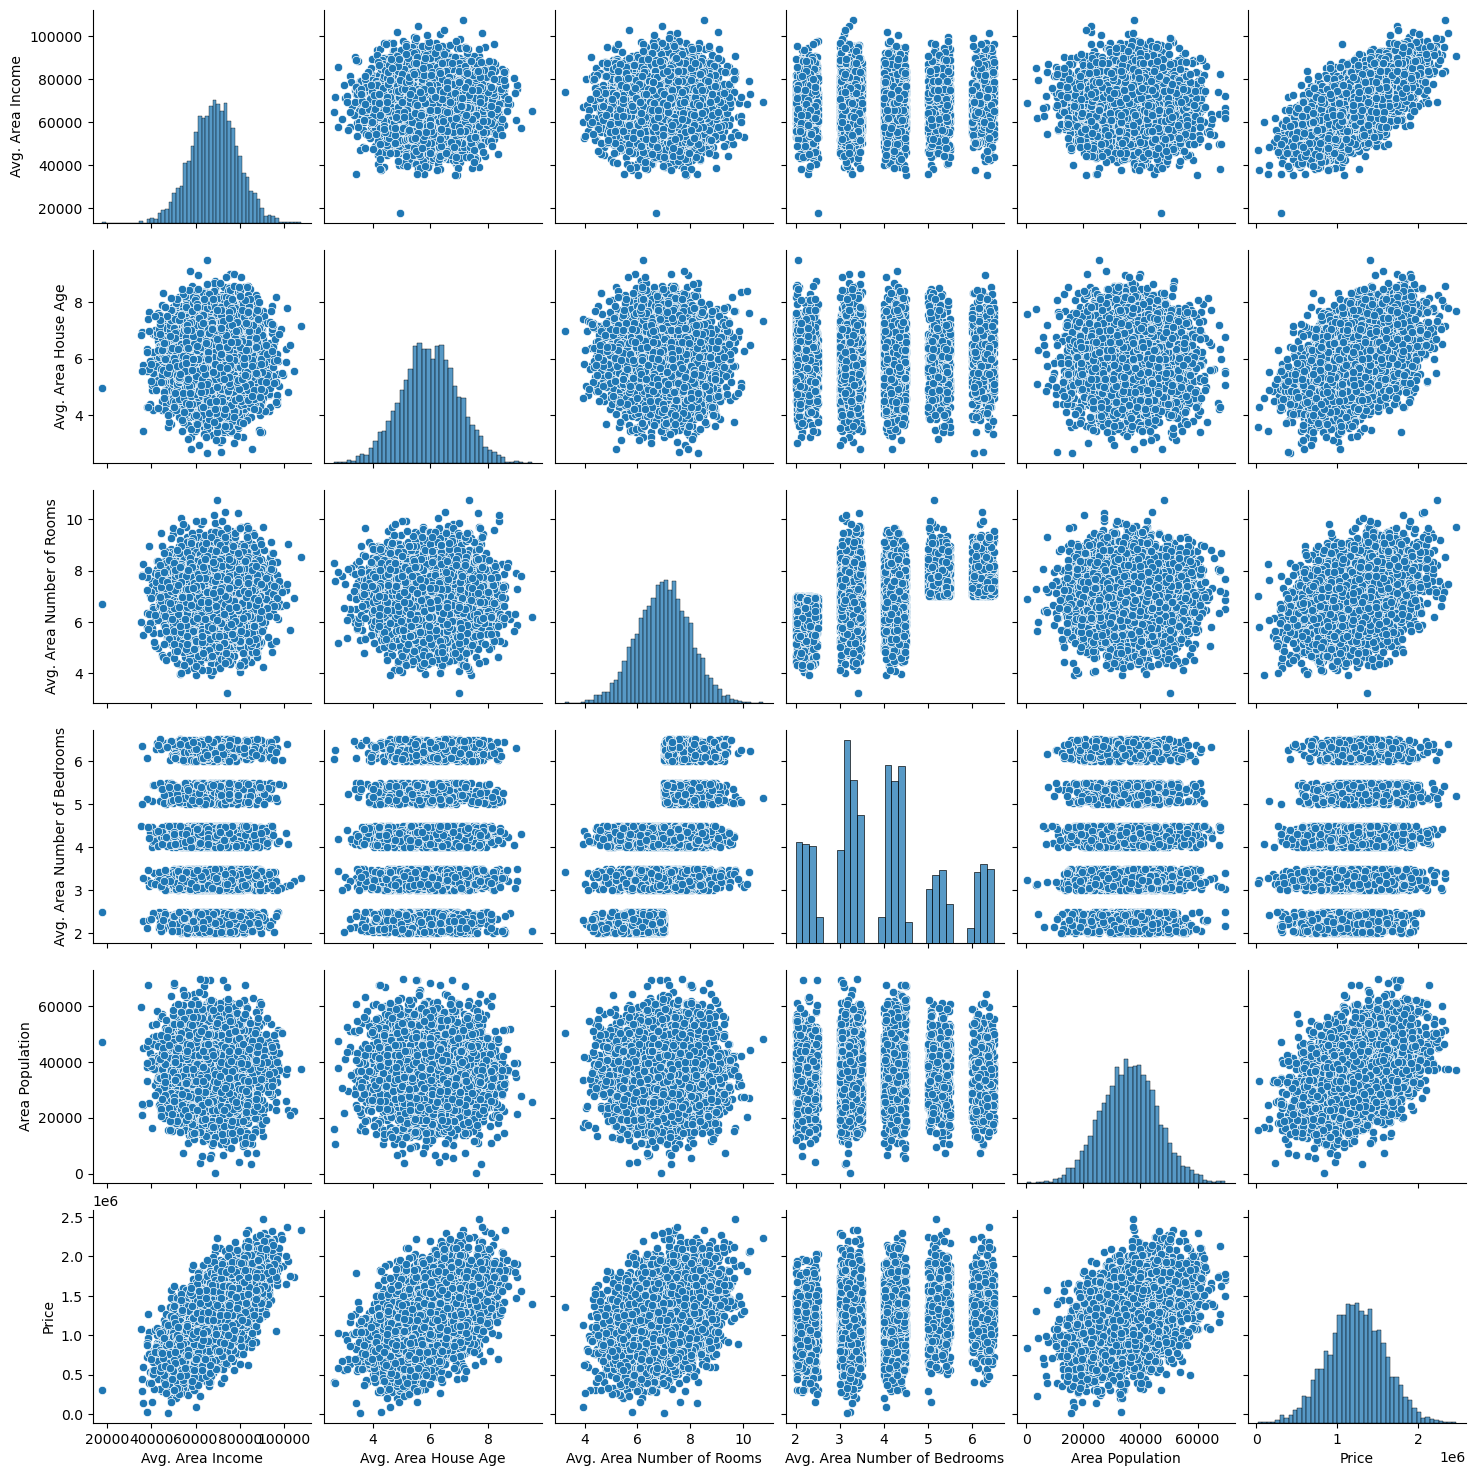

In [18]:
sns.pairplot(df)

### Data Pre-processing

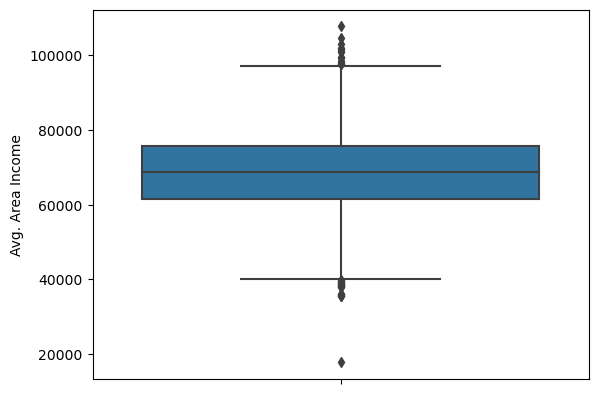

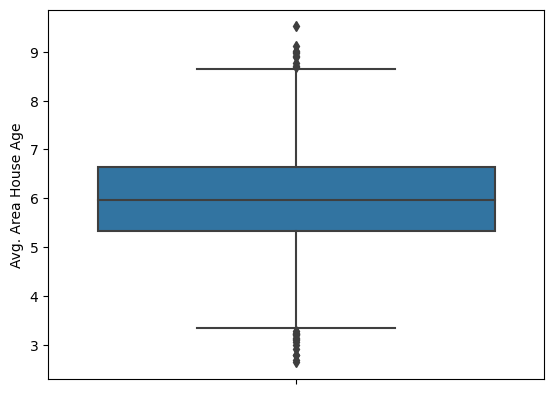

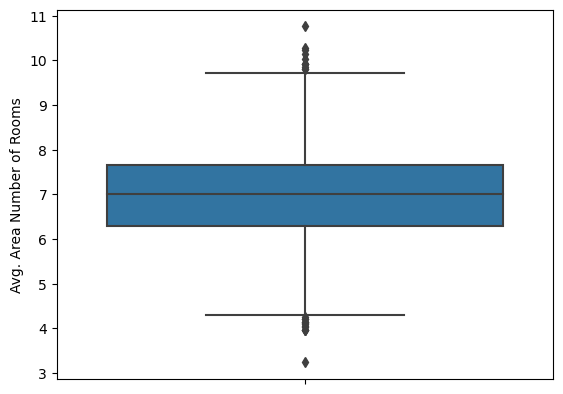

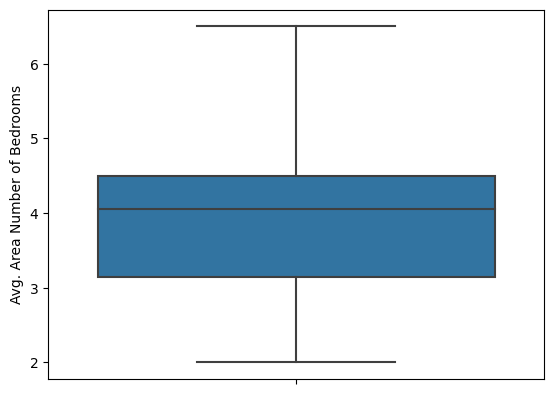

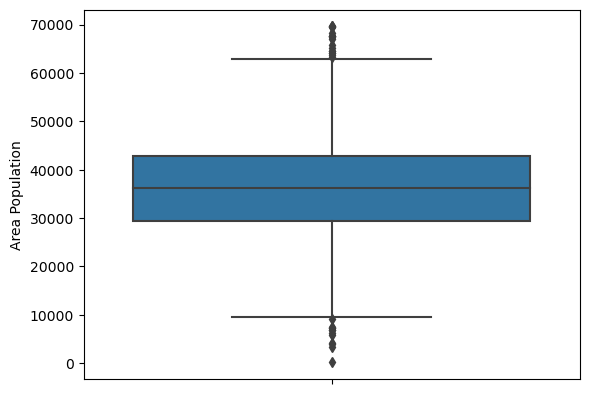

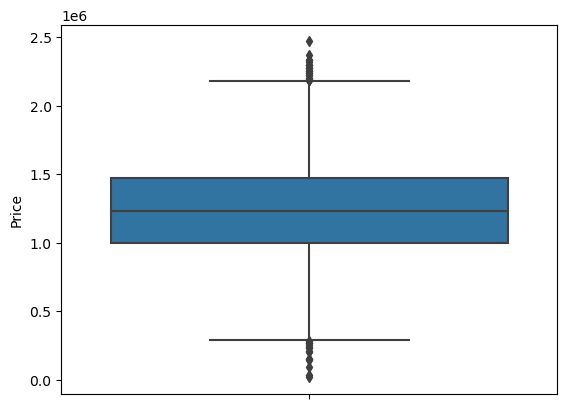

In [19]:
# finding outliers
def boxplot(cols):
    sns.boxplot(y=df[cols])
    plt.show()
    
for i in list(df.columns):
    boxplot(i)

In [20]:
# outlier treatment
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
max_fence=Q3+1.5*IQR
min_fence=Q1-1.5*IQR

In [21]:
df2=np.where(df<=min_fence,min_fence,np.where(df>=max_fence,max_fence,df))

In [22]:
df2

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04, 1.05903356e+06],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04, 1.50589092e+06],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04, 1.05898799e+06],
       ...,
       [6.33906869e+04, 7.25059062e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04, 1.03072958e+06],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04, 1.19865687e+06],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04, 1.29895048e+06]])

In [23]:
df2=pd.DataFrame(df2,columns=df.columns)

In [24]:
df2.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05

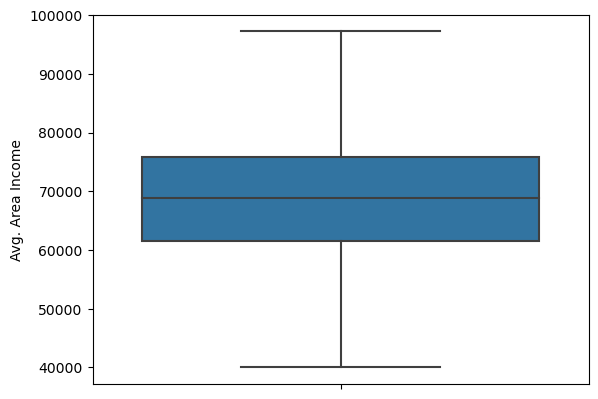

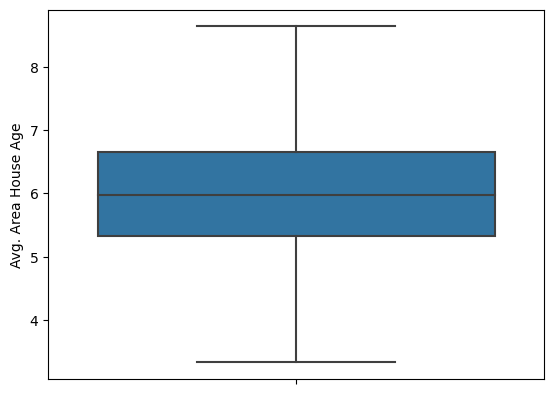

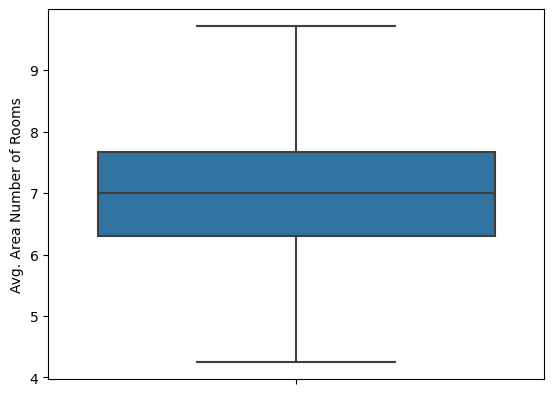

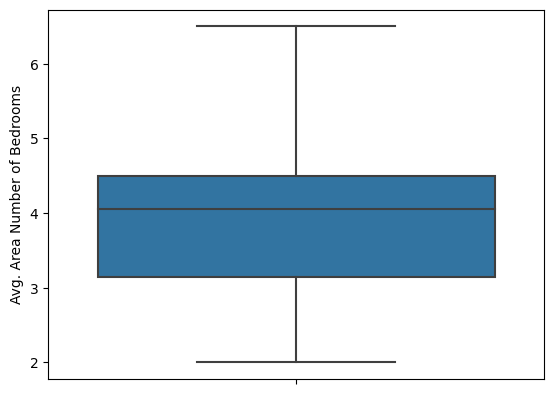

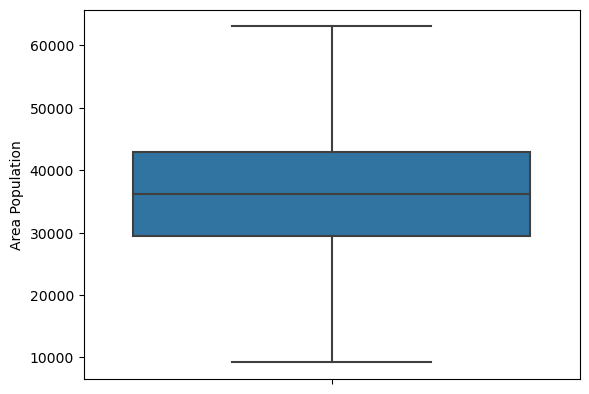

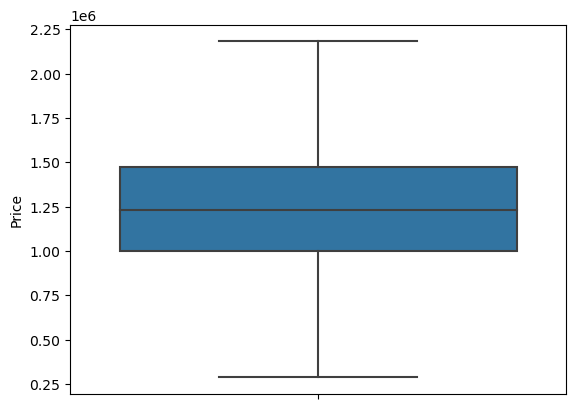

In [25]:
#recheking for outliers
def boxplot(cols):
    sns.boxplot(y=df2[cols])
    plt.show()
    
for i in list(df2.columns):
    boxplot(i)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


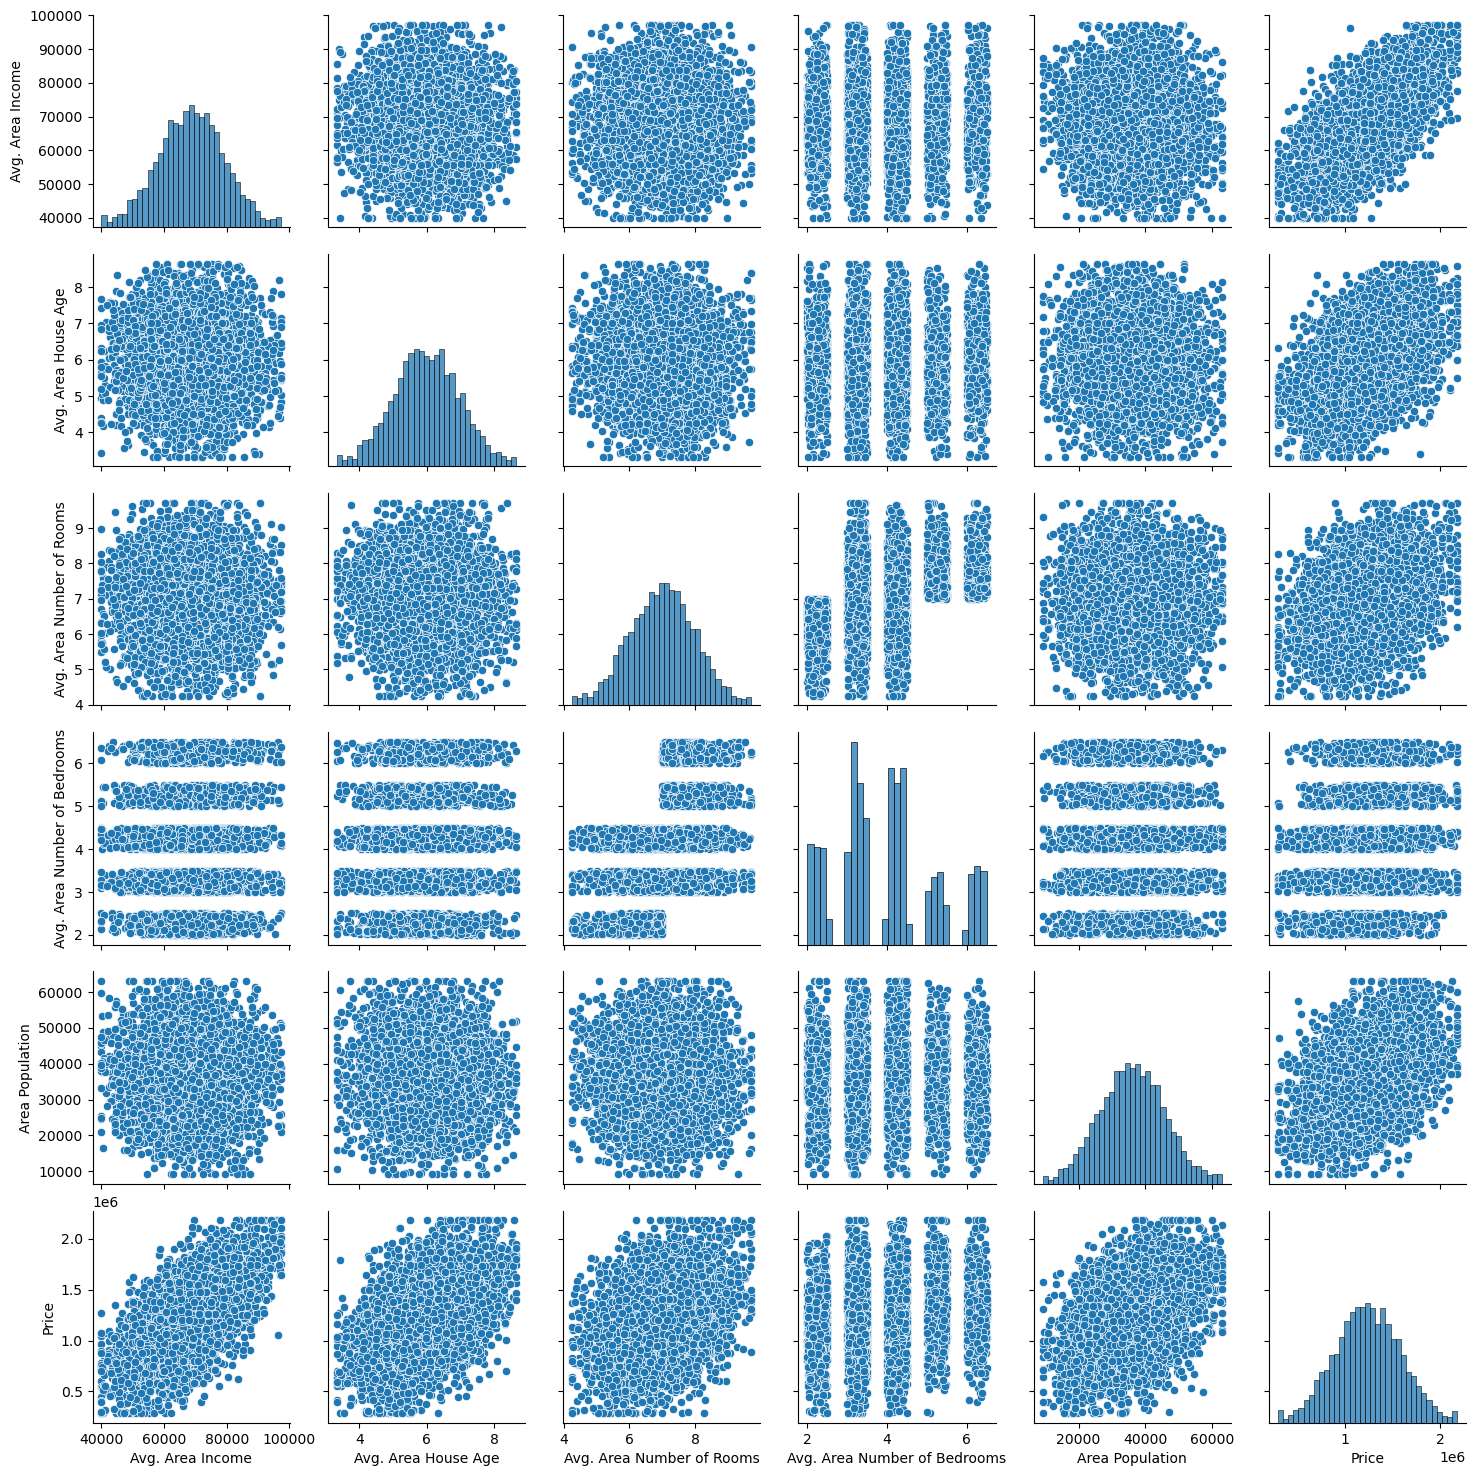

In [27]:
sns.pairplot(df2)

<AxesSubplot:xlabel='Price', ylabel='Density'>

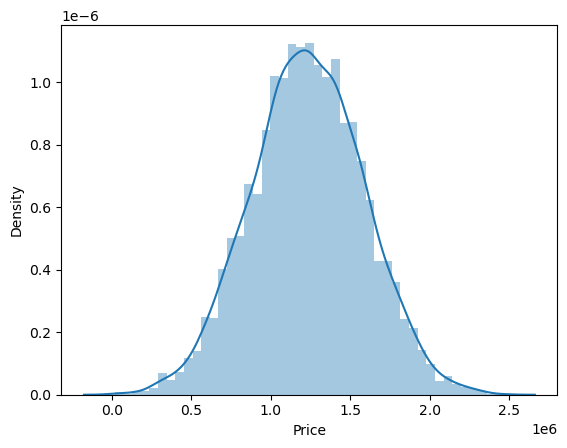

In [28]:
sns.distplot(df['Price'],kde=True)

In [29]:
df2.skew()    # +/- 3 then it is a normal distribution

Avg. Area Income               -0.023647
Avg. Area House Age            -0.001698
Avg. Area Number of Rooms      -0.045766
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.041218
Price                          -0.005147
dtype: float64

In [30]:
df2.kurtosis()   # +/-5 then we can consider as a normal distribution

Avg. Area Income               -0.134927
Avg. Area House Age            -0.187223
Avg. Area Number of Rooms      -0.174038
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.161272
Price                          -0.175444
dtype: float64

<AxesSubplot:>

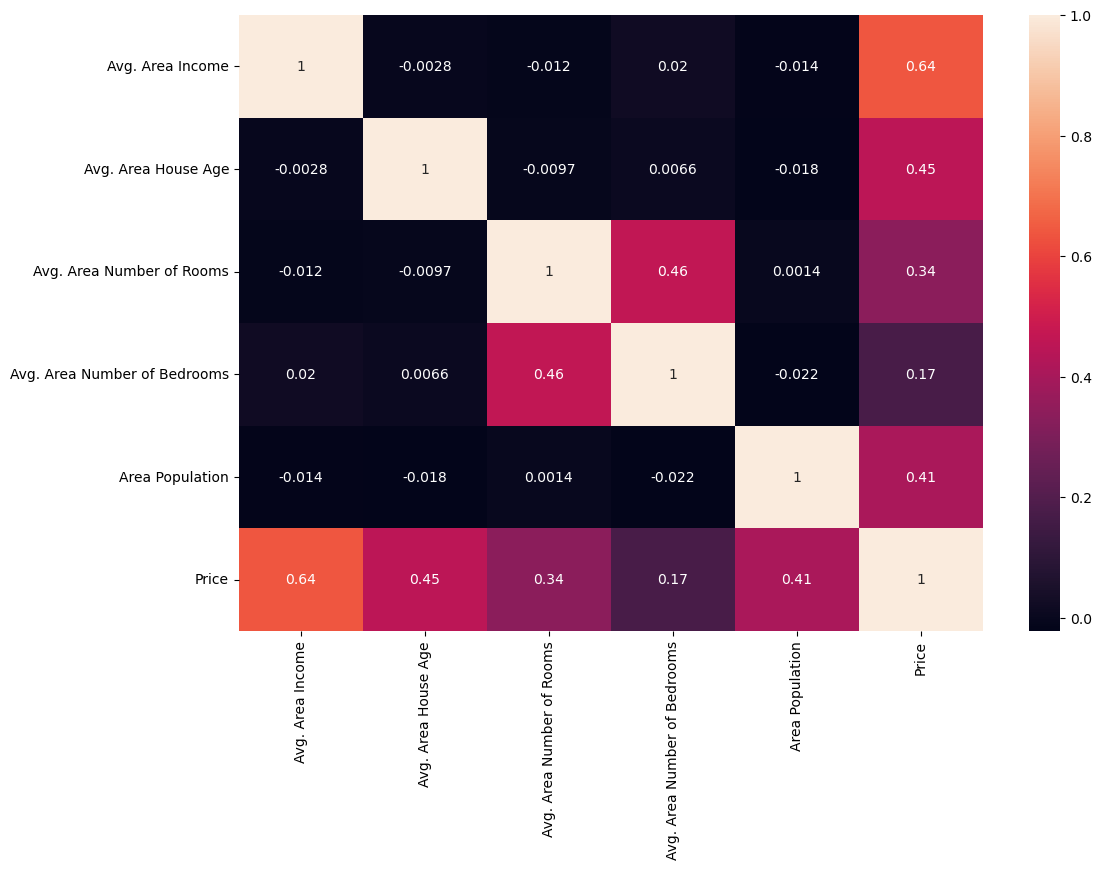

In [31]:
# checking for multi-collinearity
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True)

In [32]:
## no multicollinearity
## beacause the degreee of corr is not more than (0.80)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


### Splitting the dataset into Independent and Dependent Variable

In [34]:
# independent variable
X=df2.drop(('Price'),axis=1)

In [35]:
X.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09      23086.80050  
1                          3.09      40173.07217  
2                          5.13      36882.15940  
3                          3.26      34310.24283  
4                          4.23      26354.10947

In [36]:
# dependent Variable
Y=df2['Price']

In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [38]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [39]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [40]:
X_scaled.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.034822            -0.298541                   0.021527   
1          1.006797             0.025747                  -0.256355   
2         -0.689128            -0.113082                   1.522445   
3         -0.494796             1.226822                  -1.398453   
4         -0.812333            -0.949376                   0.850279   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.088062        -1.325622  
1                     -0.722301         0.407049  
2                      0.930840         0.073326  
3                     -0.584540        -0.187484  
4                      0.201513        -0.994293

WHAT ARE THE ASSUMPTIONS OF Linear Regression/ORDINARY LEAST SQUARES (OLS)?

Individuals (observations) are independent. It is in general true in daily situations 

Variance is homogeneous.

Residuals follow a normal distribution.

In [41]:
X1=X_scaled.copy()

In [42]:
## Without adding constant

In [43]:
import statsmodels.api as sm 
#X1=sm.add_constant(X1)
X1.head()
# not adding constant

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.034822            -0.298541                   0.021527   
1          1.006797             0.025747                  -0.256355   
2         -0.689128            -0.113082                   1.522445   
3         -0.494796             1.226822                  -1.398453   
4         -0.812333            -0.949376                   0.850279   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.088062        -1.325622  
1                     -0.722301         0.407049  
2                      0.930840         0.073326  
3                     -0.584540        -0.187484  
4                      0.201513        -0.994293

In [44]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf
from sklearn.metrics import accuracy_score

In [45]:
# endogenous:-dependent variable
# exogeneous:-independent variable

In [46]:
OLS_model=smf.OLS(Y,X1)

In [47]:
OLS_result=OLS_model.fit()

In [48]:
OLS_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.069
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              73.91
Date:                Thu, 26 Oct 2023   Prob (F-statistic):                    6.63e-75
Time:                        11:36:01   Log-Likelihood:                         -77232.
No. Observations:                5000   AIC:                                  1.545e+05
Df Residuals:                    4995   BIC:                                  1.545e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income              2.285e+05   1.75e+04     13.053      0.000    1.94e+05    2.63e+05
Avg. Area House Age           1.633e+05   1.75e+04      9.333      0.000    1.29e+05    1.98e+05
Avg. Area Number of Rooms      1.21e+05   1.98e+04      6.125      0.000    8.23e+04     1.6e+05
Avg. Area Number of Bedrooms  1744.4540   1.98e+04      0.088      0.930    -3.7e+04    4.05e+04
Area Population               1.497e+05   1.75e+04      8.556      0.000    1.15e+05    1.84e+05
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.598
Skew:                           0.015   Prob(JB):                        0.100
Kurtosis:                       2.855   Cond. No.                         1.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# adding the constant

In [50]:
import statsmodels.api as sm # required for adding a constant
X1=sm.add_constant(X1)
X1.head()

const  Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0    1.0          1.034822            -0.298541                   0.021527   
1    1.0          1.006797             0.025747                  -0.256355   
2    1.0         -0.689128            -0.113082                   1.522445   
3    1.0         -0.494796             1.226822                  -1.398453   
4    1.0         -0.812333            -0.949376                   0.850279   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.088062        -1.325622  
1                     -0.722301         0.407049  
2                      0.930840         0.073326  
3                     -0.584540        -0.187484  
4                      0.201513        -0.994293

In [51]:
OLS_model=smf.OLS(Y,X1)

In [52]:
OLS_result=OLS_model.fit()

In [53]:
OLS_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.096e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:36:02   Log-Likelihood:                -64734.
No. Observations:                5000   AIC:                         1.295e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.232e+06   1436.427    857.703      0.000    1.23e+06    1.23e+06
Avg. Area Income              2.285e+05   1437.240    158.952      0.000    2.26e+05    2.31e+05
Avg. Area House Age           1.633e+05   1436.848    113.644      0.000     1.6e+05    1.66e+05
Avg. Area Number of Rooms      1.21e+05   1622.175     74.579      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1744.4540   1622.715      1.075      0.282   -1436.780    4925.688
Area Population               1.497e+05   1437.269    104.183      0.000    1.47e+05    1.53e+05
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.598
Skew:                           0.015   Prob(JB):                        0.100
Kurtosis:                       2.855   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
OLS_result.tvalues# it will give the value of solpes and intercept

const                           857.703264
Avg. Area Income                158.951757
Avg. Area House Age             113.643692
Avg. Area Number of Rooms        74.578931
Avg. Area Number of Bedrooms      1.075022
Area Population                 104.182839
dtype: float64

In [55]:
# Variance Inflation Factor

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# blank dataframe
VIF=pd.DataFrame()

In [58]:
#addding a constant is mandatory in VIF
X1.head()

const  Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0    1.0          1.034822            -0.298541                   0.021527   
1    1.0          1.006797             0.025747                  -0.256355   
2    1.0         -0.689128            -0.113082                   1.522445   
3    1.0         -0.494796             1.226822                  -1.398453   
4    1.0         -0.812333            -0.949376                   0.850279   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.088062        -1.325622  
1                     -0.722301         0.407049  
2                      0.930840         0.073326  
3                     -0.584540        -0.187484  
4                      0.201513        -0.994293

In [59]:
X1.values

array([[ 1.        ,  1.0348221 , -0.29854096,  0.0215269 ,  0.08806222,
        -1.32562204],
       [ 1.        ,  1.00679683,  0.02574693, -0.25635494, -0.72230146,
         0.40704855],
       [ 1.        , -0.68912801, -0.11308223,  1.52244502,  0.93084045,
         0.07332638],
       ...,
       [ 1.        , -0.49050507,  1.29000432, -2.17873777, -1.50025059,
        -0.29336339],
       [ 1.        , -0.05516985, -0.44898526,  0.14227176,  1.18205319,
         0.65575453],
       [ 1.        , -0.29034543,  0.01501175, -0.19494709,  0.07185495,
         1.04877464]])

In [60]:
VIF["Variance Inflation Factor"]=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]

In [61]:
VIF['Feature']=X1.columns

In [62]:
VIF

Variance Inflation Factor                       Feature
0                   1.000000                         const
1                   1.001132              Avg. Area Income
2                   1.000586           Avg. Area House Age
3                   1.275347     Avg. Area Number of Rooms
4                   1.276196  Avg. Area Number of Bedrooms
5                   1.001172               Area Population

In [63]:
# HERE THE COLLINIEARITY BETWEEN TWO INDEPENDENT VARIABLES ARE LESS THAN 5 , 
#SO THERE IS NO MULTICOLLINEARITY.

## Linear Regression Model Building

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,train_size=0.75,random_state=102)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lin_mod=LinearRegression()
lin_mod.fit(X_train,Y_train)

LinearRegression()

In [67]:
Y_train_predict=lin_mod.predict(X_train)

In [69]:
Y_test_predict=lin_mod.predict(X_test)
print(lin_mod.score(X_train,Y_train))
print(lin_mod.score(X_test,Y_test))


0.9177212756827897
0.9124364576041154


In [70]:
Y_train.head()

92      5.856086e+05
2839    2.130762e+06
4397    1.214563e+06
965     6.793734e+05
1983    1.024788e+06
Name: Price, dtype: float64

In [71]:
Y_train_predict

array([ 777924.99558718, 2020598.98719908, 1193913.29750079, ...,
       1195979.92579483,  716690.80567016, 1291474.22484236])

In [72]:
## Calculation R2 

actual_minus_predicted = sum((Y_train - Y_train_predict)**2)
actual_minus_actual_mean = sum((Y_train - Y_train.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.9177212756827896


In [73]:
print("Training Accuracy:-",lin_mod.score(X_train,Y_train))  # training accuracy

Training Accuracy:- 0.9177212756827897


In [74]:
print("Testing Accuracy",lin_mod.score(X_test,Y_test) )   # testing accuracy

Testing Accuracy 0.9124364576041154


In [75]:
lin_mod.intercept_   # intercept value

1232616.31192207

In [76]:
lin_mod.coef_    # coefficient 

array([226961.86183436, 163522.43560878, 121706.62790867,   1020.68047798,
       149399.12814563])

In [77]:
coeff_df=pd.DataFrame(lin_mod.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income              226961.861834
Avg. Area House Age           163522.435609
Avg. Area Number of Rooms     121706.627909
Avg. Area Number of Bedrooms    1020.680478
Area Population               149399.128146

In [78]:
Y_test.head()

3724    6.150557e+05
445     1.468513e+06
4451    2.871275e+05
136     1.172386e+06
1100    1.582140e+06
Name: Price, dtype: float64

In [79]:
Y_predict=lin_mod.predict(X_test)

In [80]:
final=pd.DataFrame()

In [81]:
final["Y_test"]=Y_test

In [82]:
final["Y_predicted"]=Y_predict

In [83]:
final.head(10)

Y_test   Y_predicted
3724  6.150557e+05  7.795960e+05
445   1.468513e+06  1.452052e+06
4451  2.871275e+05  4.860951e+05
136   1.172386e+06  1.153179e+06
1100  1.582140e+06  1.474537e+06
4724  1.433494e+06  1.483724e+06
4316  9.969964e+05  1.113260e+06
479   8.594280e+05  1.066172e+06
196   7.493831e+05  7.773216e+05
722   1.251664e+06  1.150905e+06

In [84]:
test_score=lin_mod.score(X_test,Y_test)
print("test score",test_score)

test score 0.9124364576041154


In [85]:
train_score=lin_mod.score(X_train,Y_train)
print("train score",train_score)

train score 0.9177212756827897


In [86]:
# Making new dataframe to test new data

In [87]:
# import pandas library
import pandas as pd

# dictionary with list object in values
details = {
'Avg. Area Income' : [100,200,300,400],
'Avg. Area House Age' : [2,3,4,5],
'Avg. Area Number of Rooms' : [4,5,6,7],
'Avg. Area Number of Bedrooms' : [3,4,5,6],
'Area Population' : [23000, 21000, 22000, 21000],
}

# creating a Dataframe object
df = pd.DataFrame(details)

df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0               100                    2                          4   
1               200                    3                          5   
2               300                    4                          6   
3               400                    5                          7   

   Avg. Area Number of Bedrooms  Area Population  
0                             3            23000  
1                             4            21000  
2                             5            22000  
3                             6            21000

In [88]:
df_predict=lin_mod.predict(df)

In [89]:
df1=df.copy()

In [90]:
df1["Price_predicted"]=df_predict

In [91]:
df1.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0               100                    2                          4   
1               200                    3                          5   
2               300                    4                          6   
3               400                    5                          7   

   Avg. Area Number of Bedrooms  Area Population  Price_predicted  
0                             3            23000     3.460926e+09  
1                             4            21000     3.185110e+09  
2                             5            22000     3.357491e+09  
3                             6            21000     3.231075e+09

In [92]:
#Regression Model Evaluation

In [93]:
#Mean Absolute Error : mean absolute Difference between the data and its average
from sklearn.metrics import mean_absolute_error,mean_squared_error

#mean_absolute_error(original value,Predicted value)
print("Mean_Absolute_Error:-",mean_absolute_error(Y_test,Y_predict))


"""
Mean Squared Error:It is as similar to the above metric wherein
Mean Squared Error we will be calculating the square 
of the difference between the predicted and the original data. 
"""

from sklearn.metrics import mean_squared_error
#mean_squared_error(original_data,predicted_data)
print("Mean_Squared_Error:-",mean_squared_error(Y_test,Y_predict))

Mean_Absolute_Error:- 83019.83058451458
Mean_Squared_Error:- 10610095047.133081


Mean Absolute Error (MAE): When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.

In [94]:
from sklearn.metrics import median_absolute_error
median_absolute_error(Y_test,Y_predict)

72264.62479317258

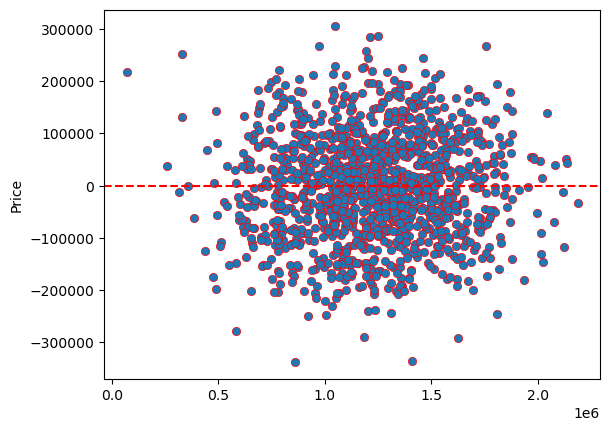

In [144]:
# residual
residuals=Y_test-Y_predict
sns.scatterplot(Y_predict,residuals,edgecolor="red")
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='Price'>

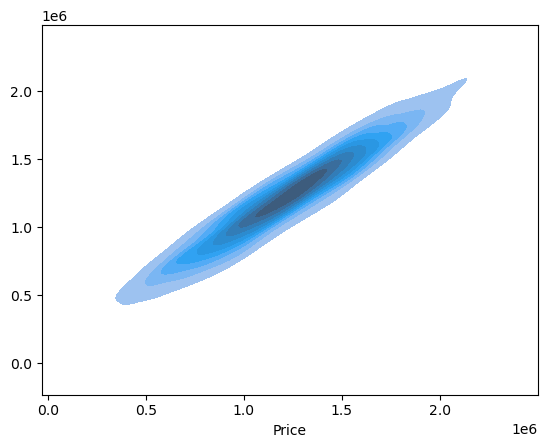

In [96]:
sns.kdeplot(Y_test,Y_predict,shade=True)

In [98]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [99]:
LR_mse=np.sqrt(mean_squared_error(Y_test,Y_predict))
print("mean square error LR : ",LR_mse )

mean square error LR :  103005.3156256175


In [100]:
rmse = np.sqrt(LR_mse)
print("Root Mean Squared Error:-",rmse)

Root Mean Squared Error:- 320.94441204921685


<AxesSubplot:xlabel='Price', ylabel='Density'>

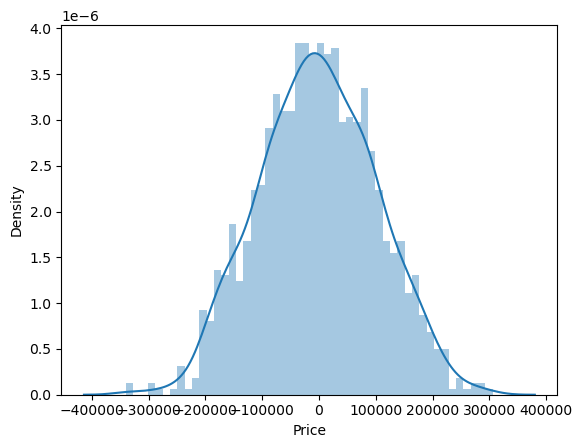

In [101]:
sns.distplot((Y_test-Y_predict),bins=50)

In [102]:
# cross_val_score

In [103]:
# Calculation of R2 Score
from sklearn.model_selection import cross_val_score

In [104]:
results_10=cross_val_score(lin_mod, X_scaled, Y, cv=10, scoring="r2")

In [105]:
results_10

array([0.91028846, 0.91927139, 0.91493844, 0.92226897, 0.91198698,
       0.91627798, 0.91497016, 0.92375733, 0.92031726, 0.90419119])

In [106]:
print(cross_val_score(lin_mod, X_scaled, Y, cv=10, scoring="r2").mean())

0.9158268150345361


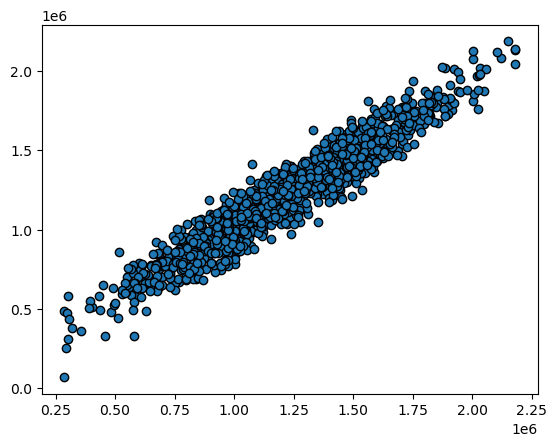

In [107]:
plt.scatter(Y_test,Y_predict,edgecolor="black")

Text(0, 0.5, 'Predicted Value Y Predicted')

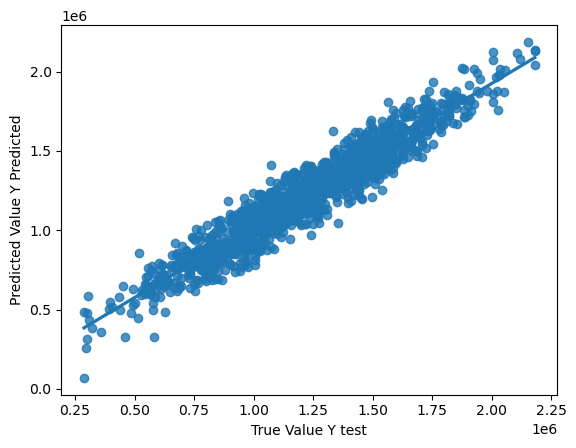

In [108]:
sns.regplot(x=Y_test,y=Y_predict,robust=True)
plt.xlabel("True Value Y test")
plt.ylabel("Predicted Value Y Predicted")

Text(0, 0.5, 'Predicted Value Y Predicted')

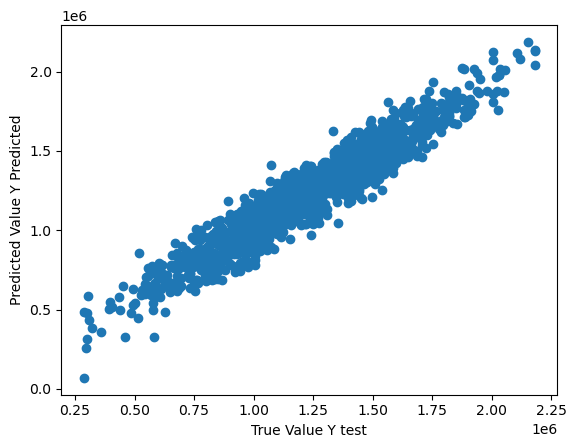

In [109]:
import matplotlib.cm as cm
plt.scatter(Y_test,Y_predict)
plt.xlabel("True Value Y test")
plt.ylabel("Predicted Value Y Predicted")

# Lasso And Rigde Regression

In [110]:
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LassoCV,ElasticNet,ElasticNetCV ,Lasso

In [111]:
#lasso_model=LassoCV(cv=10,max_iter=1000)
lasso_model=Lasso(alpha=0.1, precompute=True, warm_start=True, positive=True,  selection='random', random_state=42)

In [112]:
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.1, positive=True, precompute=True, random_state=42,
      selection='random', warm_start=True)

In [113]:
lasso_model.score(X_test, Y_test)

0.9124366739543872

In [114]:
#RIDGE REGRESSION METHOD

#ridgecv=RidgeCV(cv=10)
ridgecv=Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
ridgecv.fit(X_train,Y_train)
ridgecv.score(X_test,Y_test)

0.9113184112990795

In [115]:
# CALCULATING R2 SQUARE VALUES

from sklearn.metrics import r2_score


In [116]:
# Calculation of R2 Score
from sklearn.model_selection import cross_val_score
print(cross_val_score(lin_mod, X, Y, cv=10, scoring="r2").mean()),r2_score(Y_test,Y_predict)

0.9158268150345293


(None, 0.9124364576041154)

In [117]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
elastic.fit(X_train,Y_train)
elastic.score(X_test,Y_test)

0.9121657910976003

In [118]:
#LASSO METHOD IS USED TO FIND WHETHER THE MODEL IS OVERFIT OR NOT
#RIDGE METHOD IS USED TO FIND WHETHER THE MODEL IS UNDERFIT OR NOT

In [119]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)

In [120]:
sgd_reg.fit(X_train,Y_train)
sgd_reg.score(X_test,Y_test)

0.9124364699989433

In [121]:
# Hyper Paranmeter basic

In [122]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [123]:
LassoReg = Lasso()
parameters = {'alpha':[0,0.1,0.5,1,5,10],'fit_intercept': [True,False]}

Lasso_reg= GridSearchCV(LassoReg, parameters, scoring='neg_mean_squared_error',cv=20)

In [124]:
%%time
Lasso_reg.fit(X_train,Y_train)

Wall time: 3.94 s


GridSearchCV(cv=20, estimator=Lasso(),
             param_grid={'alpha': [0, 0.1, 0.5, 1, 5, 10],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [125]:
# best estimator
print(Lasso_reg.best_estimator_)

# best model
best_model = Lasso_reg.best_estimator_
best_model.fit(X_train,Y_train)
y_predicted = best_model.predict(X_test)
print(best_model.score(X_train,Y_train)*100)

print(mean_squared_error(Y_test, y_predicted))

Lasso(alpha=10)
91.77212724610956
10610240880.275703


In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.001,0.01,0.1,0.2,0.4, 0.5,0.7,0.9,1,5,10]}
             

RidgeReg = Ridge()

Ridge_reg= GridSearchCV(RidgeReg, parameters, scoring='neg_mean_squared_error',cv=20)


In [127]:
%%time
Ridge_reg.fit(X_train,Y_train)

Wall time: 1.68 s


GridSearchCV(cv=20, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error')

In [128]:
# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model2 = Ridge_reg.best_estimator_
best_model2.fit(X_train,Y_train)
y_predicted = best_model2.predict(X_test)
print(best_model2.score(X_train,Y_train)*100)
#print(mean_squared_error(y_test, y_predicted, squared=False))

Ridge(alpha=0.7)
91.7721241382432


In [129]:
# KNN Model

In [130]:
from sklearn.neighbors import KNeighborsRegressor
knn_S_5=KNeighborsRegressor(n_neighbors=5) 
knn_S_5.fit(X_train,Y_train)


Y_pred_KNN_train1=knn_S_5.predict(X_train)
Y_pred_KNN_test1=knn_S_5.predict(X_test)

# Get the RMSE for the train dataset
print(np.sqrt(mean_squared_error(Y_train, Y_pred_KNN_train1)))
 
# Get the RMSE for the test dataset
print(np.sqrt(mean_squared_error(Y_test, Y_pred_KNN_test1)))
print(r2_score(Y_test, Y_pred_KNN_test1))

104552.95120979787
127129.4783903284
0.8666181986150658


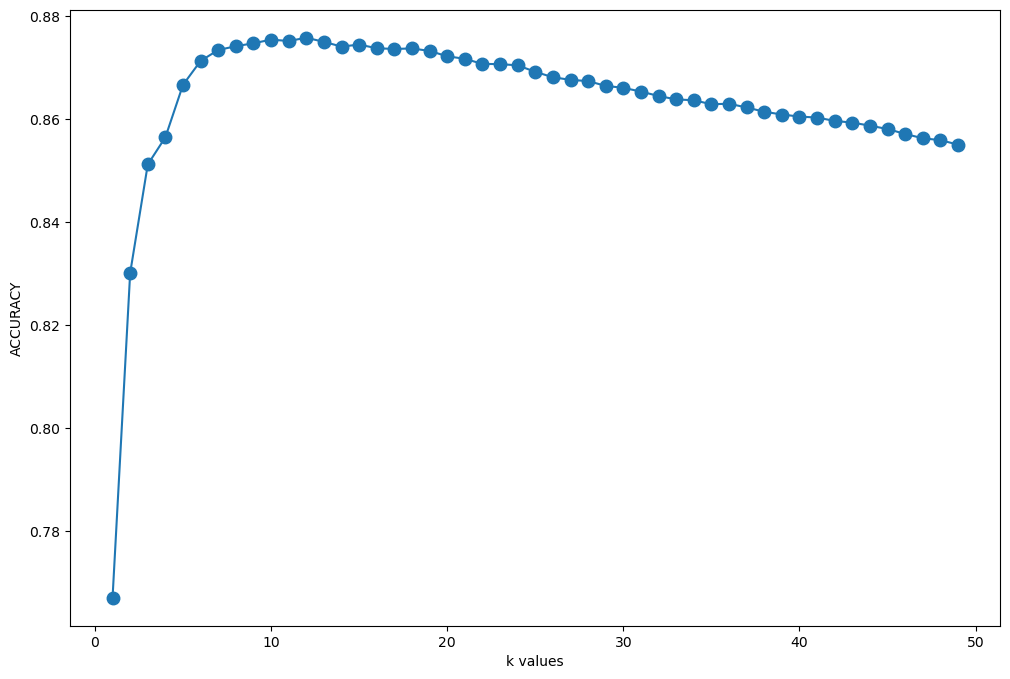

In [131]:
# find the more effective value of n_neighbors parameter:
from sklearn .metrics import accuracy_score
accuracy_K = []
for k in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy =r2_score(Y_test, Y_pred)
    accuracy_K.append(accuracy)
   
plt.figure(figsize=(12,8))
plt.xlabel("k values")
plt.ylabel("ACCURACY")
plt.plot(range(1,50),accuracy_K, marker='o', markersize=9)

In [132]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy =r2_score(Y_test, Y_pred)
accuracy

0.8746914378544894

# Conclusion

In [133]:
print(f"Training Accuracy:- {round(lin_mod.score(X_train,Y_train)*100,2)} %")
print("============="*5)
print(f"Testing Accuracy:- {round(lin_mod.score(X_test,Y_test)*100,2)} %")
print("============="*5)
print(f"R-squared value:- {round(r2*100,2)} %")

Training Accuracy:- 91.77 %
Testing Accuracy:- 91.24 %
R-squared value:- 91.77 %


In [134]:
# Lasso Score after hyperparameter tunning

In [135]:
print("Lasso Score :-",(best_model.score(X_train,Y_train)*100))


Lasso Score :- 91.77212724610956


In [136]:
# Ridge Regression Score After Hyperparameter Tunnning

In [137]:
print("Ridge Score:-",(best_model2.score(X_train,Y_train)*100))

Ridge Score:- 91.7721241382432


In [138]:
# Elastic Net Score

In [139]:
print("Elastic Net Score:-",elastic.score(X_test,Y_test)*100)

Elastic Net Score:- 91.21657910976003


In [140]:
print(f"Accuracy using Linear Regression model is good for train as well as for testing data i.e for Testing {round(lin_mod.score(X_test,Y_test)*100,4)}% and for training {round(lin_mod.score(X_train,Y_train)*100,4)}%.")
print(f"R-squared value {round(r2,2)}%")
print("There is no much difference between training accuracy and testing accuracy therefore we can say that our model  is good for prediction.")

Accuracy using Linear Regression model is good for train as well as for testing data i.e for Testing 91.2436% and for training 91.7721%.
R-squared value 0.92%
There is no much difference between training accuracy and testing accuracy therefore we can say that our model  is good for prediction.
